<a href="https://colab.research.google.com/github/ivanadu/polarization/blob/main/polarization_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Notes

**Purpose**

The purpose of this project is to provide practice implementing a causal inference analysis. Specifically, I will be implementing and interpreting data analysis related to political polarization.

In [ ]:
# importing packages needed
from google.colab import drive
import pandas as pd
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Legislator Ideal Points

In this section, I will interpret some estimates of legislators' ideal points from the 79th to the 118th House of Representatives. For more about how these estimates are created, visit [voteview.com](https://voteview.com).

1. Load in the data file `house_ideal_points.csv` using [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from the `pandas` module. Print the first few rows. The estimated ideal points for legislators are in the `ideal_point` column. In this version of the data, each legislator gets a single constant ideal point that is based on their voting behavior throughout their careers. The `icpsr` column is a unique identifier for legislators.

In [ ]:
# loading and reading house_ideal_points.csv file
ip_data = pd.read_csv("/content/drive/My Drive/data_analysis/polarization/house_ideal_points.csv")
ip_data.head()


,congress,chamber,icpsr,district_code,state_abbrev,party,bioname,ideal_point
0,79,House,195,3.0,AL,D,"ANDREWS, George William",-0.030
1,79,House,937,1.0,AL,D,"BOYKIN, Frank William",-0.105
2,79,House,3754,2.0,AL,D,"GRANT, George McInvale",-0.117
3,79,House,4471,4.0,AL,D,"HOBBS, Samuel Francis",-0.176
4,79,House,4892,6.0,AL,D,"JARMAN, Peterson Bryant (Pete)",-0.238


In [ ]:
# computing median ideal points by congress and party for democrats and republicans
median_ip = ip_data.groupby(['party', 'congress'])[['ideal_point']].median()
median_ip.head()

ideal_point
party congress             
D     79            -0.2575
      80            -0.2195
      81            -0.3030
      82            -0.2855
      83            -0.2710

<Axes: xlabel='congress', ylabel='ideal_point'>

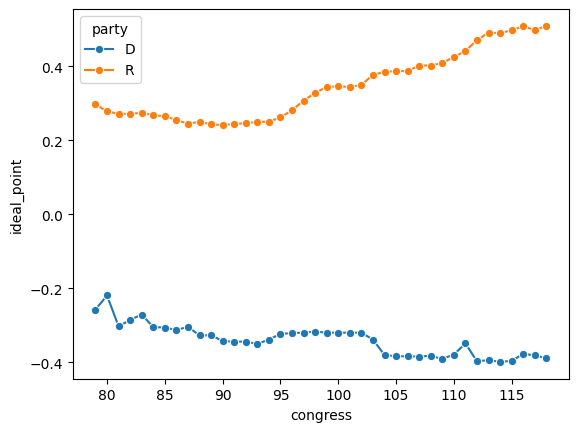

In [ ]:
# plotting ideal points over time (congress)
sns.lineplot(median_ip, x='congress', y='ideal_point', hue='party', marker = 'o')

# How has party polarization changed over time?

Overtime, party polarization has increased with ideal points of democrats and republicans diverging. In these trends, a factor that could be affecting the increase in polarization is the introduction of social media and how algorithms tend to push more extreme views for user engagement. Another cause could be the nature of the political scene and its tendancy to draw those who are more extreme as they are more passionate about their views and thus are willing to act on them by becoming involved in politics though the pay may not be the best.

In [ ]:
# finding the most extreme democrat
ip_data_D = ip_data.loc[(ip_data['congress']==118) & (ip_data['party']=='D')]
ip_data_D.sort_values(by='ideal_point')

,congress,chamber,icpsr,district_code,state_abbrev,party,bioname,ideal_point
17716,118,House,21922,29.0,TX,D,"GARCIA, Sylvia",-0.808
17727,118,House,22312,30.0,TX,D,"CROCKETT, Jasmine",-0.722
17477,118,House,21906,6.0,IL,D,"CASTEN, Sean",-0.681
17405,118,House,29778,12.0,CA,D,"LEE, Barbara",-0.678
17758,118,House,21726,7.0,WA,D,"JAYAPAL, Pramila",-0.668
...,...,...,...,...,...,...,...,...
17748,118,House,21966,7.0,VA,D,"SPANBERGER, Abigail",-0.174
17761,118,House,22358,3.0,WA,D,"PEREZ, Marie Gluesenkamp",-0.155
17583,118,House,21723,5.0,NJ,D,"GOTTHEIMER, Josh S.",-0.154
17341,118,House,22168,1.0,AK,D,"PELTOLA, Mary Sattler",-0.134


In [ ]:
# finding the most extreme republican
ip_data_R = ip_data.loc[(ip_data['congress']==118) & (ip_data['party']=='R')]
ip_data_R.sort_values(by='ideal_point')

,congress,chamber,icpsr,district_code,state_abbrev,party,bioname,ideal_point
17668,118,House,21718,1.0,PA,R,"FITZPATRICK, Brian K.",0.157
17579,118,House,14863,4.0,NJ,R,"SMITH, Christopher Henry",0.172
17586,118,House,22334,7.0,NJ,R,"KEAN, Thomas",0.233
17613,118,House,22340,17.0,NY,R,"LAWLER, Michael",0.238
17658,118,House,22308,5.0,OR,R,"CHAVEZ-DEREMER, Lori",0.242
...,...,...,...,...,...,...,...,...
17698,118,House,22357,5.0,TN,R,"OGLES, Andy",0.836
17347,118,House,21705,5.0,AZ,R,"BIGGS, Andrew S.",0.837
17684,118,House,21753,5.0,SC,R,"NORMAN, Ralph",0.852
17654,118,House,22303,2.0,OK,R,"BRECHEEN, Josh",0.912


The most moderate democrat is Jared Golden with an ideal point of -0.117 and the most extreme democrat is Sylvia Garcia with an ideal point of -0.808.

The most moderate republican is Brian K. Fitzpatrick with an ideal point of 0.157 and the most extreme republican is Rich McCormick with an ideal point of 0.969.

Looking at policy platforms, their beliefs and values do reflect their ideal points. For example, Rich McCormick is an extreme republican by his ideal point and he values the American family with his slogan "Revive freedom. Save America". Sylvia Garcia is an extreme democrat and her platform relative to McCormick's lacks mention of military, healthcare, and protecting American families. However, she makes strong and frequent reference to common democratic values such as equality for minorities/marginalized and creating an immigration policy "with a heart". Meanwhile looking at those more in the center like Brian K. Fitzpatrick and Jared Golden, they both have similar values as their extreme counterparts but also value things that may be typically associated with the opposing party. The two have a focus on deveoping systems to tackle social issues that "work for everyone".

# The Effect of Rule Changes on Extremism

In this part, I will use causal inference tools with a historical example of partisan polarization. The Gilded Age was a time of extreme partisan gridlock in the House of Representatives, in which the minority party would often frustrate the majority party's agenda with various delay tactics. One famous such tactic was the "disappearing quorum," where members of the minority party would simply refuse to declare themselves present during roll calls, thereby preventing the House from doing any business.

When the Republican party took back the majority in the 51st Congress, the Speaker of the House Thomas Reed implemented some major changes to prevent the minority party from engaging in these tactics. Among other reforms, he required that all members physically present in the chamber would be counted for purposes of a quorum, and allowed a majority vote to close debate on any part of a bill.

I will use a difference-in-differences design to ask what the effect of these rule changes were on the political extremism of members of the House.


In [ ]:
# loading house_senate_50_51.csv
hs_data = pd.read_csv('/content/drive/My Drive/data_analysis/polarization/house_senate_50_51.csv')
hs_data.head()

# NOTE: Extremism is the absolute value of a time-varying measure of the legislators' ideal points

,congress,chamber,icpsr,district_code,state_abbrev,party,bioname,extremism
0,50,House,403,6.0,AL,D,"BANKHEAD, John Hollis",0.517
1,50,House,1869,5.0,AL,D,"COBB, James Edward",0.628
2,50,House,2364,4.0,AL,D,"DAVIDSON, Alexander Caldwell",0.521
3,50,House,3283,7.0,AL,D,"FORNEY, William Henry",0.575
4,50,House,4349,2.0,AL,D,"HERBERT, Hilary Abner",0.516


7. The simplest strategy would be to compare extremism in the House before and after the implementation of Reed's rules. Compute the difference in average extremism among all members of the House from the 50 to 51st Congresses. Print and interpret this difference.

In [ ]:
# comparing extremism in the House before and after implementation of Reed's rules
hs_means = hs_data.groupby((['congress', 'chamber'])).agg({'extremism':'mean'})
avg_extremism = hs_means.loc[51,'House'].at["extremism"]-hs_means.loc[50,'House'].at["extremism"]
avg_extremism

0.020573336751471882

This difference computed is the change in extremism from the 50th House to the 51st. This shows an increase in average extremism across the whole House after the implementation of Reed's rule, meaning that political polarization increased.

DISCLAIMER: We may not believe that this difference captures the true causal effect of Reed's rule as this difference may have happened due to other factors and thus would have existed even in the absence of the implementation of Reed's rule. However, since both realities cannot exist (we can't implement and not implement Reed's rule in the same timeframe), it is impossible to see the difference in extremism given the absence of the implementation of Reed's rule.

To make the before-vs-after comparison more credible, I will use the Senate as a control group because the rules were implemented in the House but not the Senate. This creates a difference-in-differences design.

 Ideally, we would be able to know what extremism in the House would have been counterfactually in the absence of Reed's Rules during the 51st Congress. But we cannot observe this quantity. Instead, we use a control group to estimate our counterfactual by filling out the following $2 \times 2$ table, where $\bar{X}_{ij}$ is the average extremism for group $i$ in Congress $j$:


|    Group   | 50th Congress | 51st Congress |
|-------| ----------------| --------------|
 House | $\bar{X}_{00}$ | $\bar{X}_{01}$ |
 Senate | $\bar{X}_{10}$ | $\bar{X}_{11}$


<Axes: xlabel='congress', ylabel='extremism'>

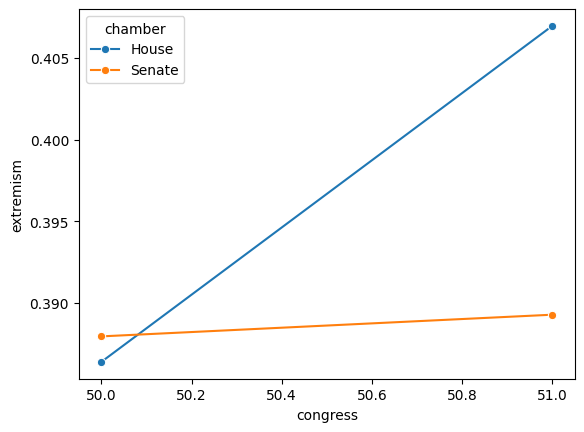

In [ ]:
sns.lineplot(hs_means, x='congress', y='extremism', hue='chamber', marker='o')

The quantity we will be using to estimate the counterfactual for the House in the 51st congress is the change in measure of extremism for the Senate from the 50th to 51st congress. The assumption that justifies this is the parallel trends assumption that assumes that before the treatment, both trends were increasing/decreasing at the same rate and the control group would've still experience the same change as the treatment group if the treatment wasn't performed. In this example, this means that extremism was increasing at the same rate for both House and Senate before the implementation of Reed's rule and the Senate, which we are considering the control, increases the same amount as the House would have.

In [ ]:
# hs_means viewer
hs_means.head()

extremism
congress chamber           
50       House     0.386383
         Senate    0.387947
51       House     0.406957
         Senate    0.389275

In [ ]:
# computing difference in difference
dd = hs_means.loc[51, 'Senate'].at['extremism'] - hs_means.loc[50, 'Senate'].at['extremism'] + hs_means.loc[50, 'House'].at['extremism']
dd

0.38771079243649476

Without the implementation of Reed's rule, the measure of average extremism in the House of the 51st Congress would be about 0.3877.

The validity of this estimate is threatened as it is under the assumption of independence of House and Senate, which is to say that the implementation of Reed's rule in the House has zero effect on the Senate. However in the complex web of politics, it is unlikely that there was no effect on the Senate. If I had more time with the data, the best solution may be to look at the trends before the implementation of Reed's rule for the Senate and see if the change in extremism post-treatment was out of the ordinary. Another threat to the validity is the assumption that no other major events affecting the political scene happened in the time from the 50th to 51st Congress. Any other large change could affect extremism and also give a misleading trend that we were basing estimate off of. Given more data, this may be mitigated by examining what other events occurred, performing additional tests to see if those had any effect of extremism, and accounting for those in this test.